In [28]:
## Loading the libraries

import os
import pandas as pd
import numpy as np
from fancyimpute import KNN
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.svm import SVC 
from sklearn.metrics import classification_report

In [2]:
os.chdir("D:/DATA SCIENCE/PYTHON")

In [3]:
## Reading the data

In [4]:
A_train = pd.read_csv("Train_data.csv")

In [5]:
B_test = pd.read_csv("Test_data.csv")

In [ ]:
# Merging the data for easier pre processing

In [6]:
X = A_train.append(B_test)

In [7]:
X.shape

(5000, 21)

In [8]:
X.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
dtype: int64

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 21 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null int64
phone number                     5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes           

In [10]:
X.drop(['phone number'] , axis = 1 , inplace = True )

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 20 columns):
state                            5000 non-null object
account length                   5000 non-null int64
area code                        5000 non-null int64
international plan               5000 non-null object
voice mail plan                  5000 non-null object
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes               5000 non-null float64
total intl calls            

In [ ]:
## Boxplot 

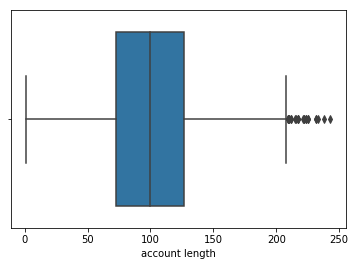

In [12]:
sns.boxplot(X['account length'])

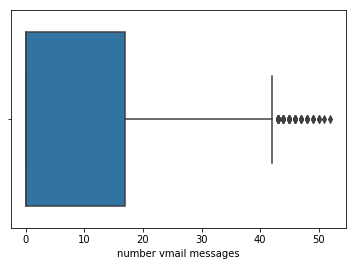

In [13]:
sns.boxplot(X['number vmail messages'])

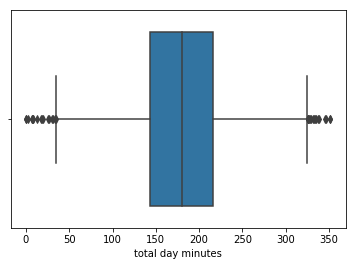

In [14]:
sns.boxplot(X['total day minutes'])

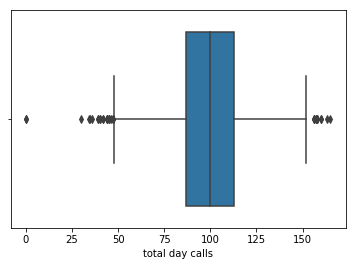

In [15]:
sns.boxplot(X['total day calls'])

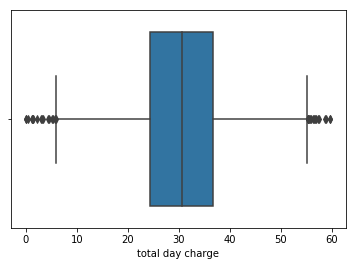

In [16]:
sns.boxplot(X['total day charge'])

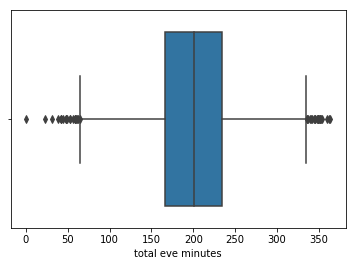

In [17]:
sns.boxplot(X['total eve minutes'])

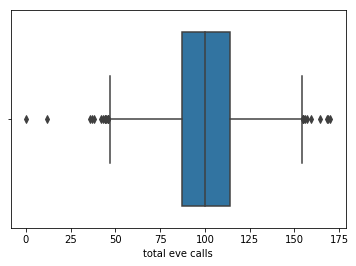

In [18]:
sns.boxplot(X['total eve calls'])

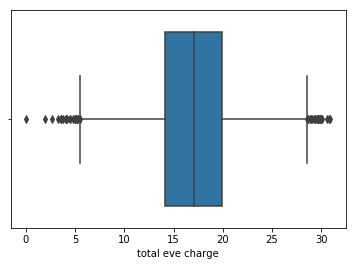

In [19]:
sns.boxplot(X['total eve charge'])

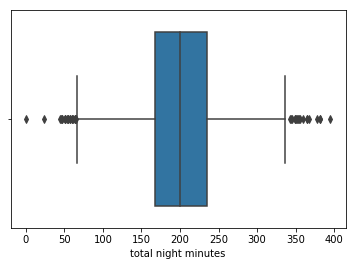

In [20]:
sns.boxplot(X['total night minutes'])

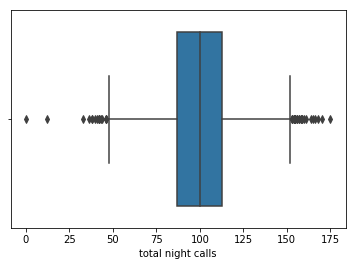

In [21]:
sns.boxplot(X['total night calls'])

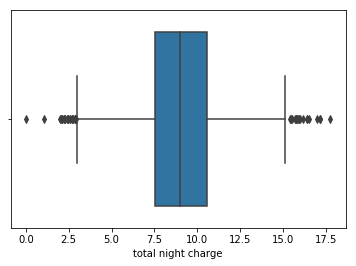

In [22]:
sns.boxplot(X['total night charge'])

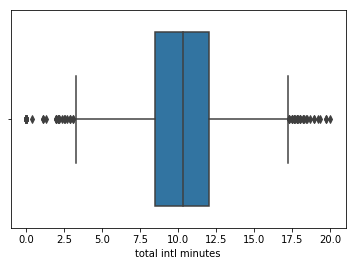

In [23]:
sns.boxplot(X['total intl minutes'])

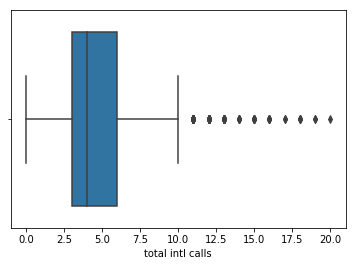

In [24]:
sns.boxplot(X['total intl calls'])

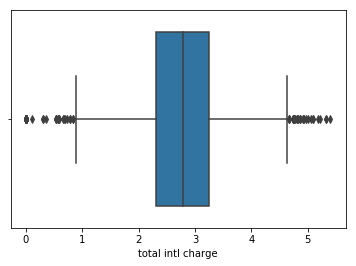

In [25]:
sns.boxplot(X['total intl charge'])

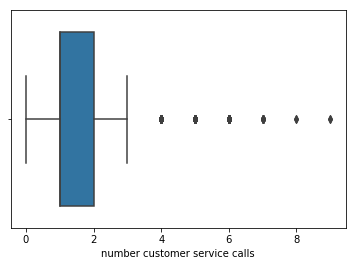

In [26]:
sns.boxplot(X['number customer service calls'])

In [27]:
cnames = ["account length" , "number vmail messages" , "total day minutes" , "total day calls" , "total day charge" , 
          "total eve minutes" , "total eve calls" , "total eve charge" , "total night minutes" , "total night calls" , 
         "total night charge" , "total intl minutes" , "total intl calls" , "total intl charge" , 
          "number customer service calls"]

In [119]:
Y = X[['Churn', 'international plan' , 'voice mail plan' , 'state']]

In [120]:
X.drop(['international plan' , 'voice mail plan' , 'Churn' , 'state'] , axis = 1 , inplace = True )

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1666
Data columns (total 16 columns):
account length                   5000 non-null int64
area code                        5000 non-null int64
number vmail messages            5000 non-null int64
total day minutes                5000 non-null float64
total day calls                  5000 non-null int64
total day charge                 5000 non-null float64
total eve minutes                5000 non-null float64
total eve calls                  5000 non-null int64
total eve charge                 5000 non-null float64
total night minutes              5000 non-null float64
total night calls                5000 non-null int64
total night charge               5000 non-null float64
total intl minutes               5000 non-null float64
total intl calls                 5000 non-null int64
total intl charge                5000 non-null float64
number customer service calls    5000 non-null int64
dtypes: float64(8), int64(8)


In [121]:
X['area code'] = X['area code'].astype(object)

In [ ]:
## Outlier removal

In [122]:
q75, q25 = np.percentile(X['account length'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['account length'] < minimum,:'account length'] = np.nan
X.loc[X['account length'] > maximum,:'account length'] = np.nan

In [123]:
q75, q25 = np.percentile(X['number vmail messages'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['number vmail messages'] < minimum,:'number vmail messages'] = np.nan
X.loc[X['number vmail messages'] > maximum,:'number vmail messages'] = np.nan

In [124]:
q75, q25 = np.percentile(X['total day minutes'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total day minutes'] < minimum,:'total day minutes'] = np.nan
X.loc[X['total day minutes'] > maximum,:'total day minutes'] = np.nan

In [125]:
q75, q25 = np.percentile(X['total day calls'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total day calls'] < minimum,:'total day calls'] = np.nan
X.loc[X['total day calls'] > maximum,:'total day calls'] = np.nan

In [126]:
q75, q25 = np.percentile(X['total day charge'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total day charge'] < minimum,:'total day charge'] = np.nan
X.loc[X['total day charge'] > maximum,:'total day charge'] = np.nan

In [127]:
q75, q25 = np.percentile(X['total eve minutes'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total eve minutes'] < minimum,:'total eve minutes'] = np.nan
X.loc[X['total eve minutes'] > maximum,:'total eve minutes'] = np.nan

In [128]:
q75, q25 = np.percentile(X['total eve calls'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total eve calls'] < minimum,:'total eve calls'] = np.nan
X.loc[X['total eve calls'] > maximum,:'total eve calls'] = np.nan

In [129]:
q75, q25 = np.percentile(X['total eve charge'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total eve charge'] < minimum,:'total eve charge'] = np.nan
X.loc[X['total eve charge'] > maximum,:'total eve charge'] = np.nan

In [130]:
q75, q25 = np.percentile(X['total night minutes'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total night minutes'] < minimum,:'total night minutes'] = np.nan
X.loc[X['total night minutes'] > maximum,:'total night minutes'] = np.nan

In [131]:
q75, q25 = np.percentile(X['total night calls'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total night calls'] < minimum,:'total night calls'] = np.nan
X.loc[X['total night calls'] > maximum,:'total night calls'] = np.nan

In [132]:
q75, q25 = np.percentile(X['total night charge'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total night charge'] < minimum,:'total night charge'] = np.nan
X.loc[X['total night charge'] > maximum,:'total night charge'] = np.nan

In [133]:
q75, q25 = np.percentile(X['total intl minutes'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total intl minutes'] < minimum,:'total intl minutes'] = np.nan
X.loc[X['total intl minutes'] > maximum,:'total intl minutes'] = np.nan

In [134]:
q75, q25 = np.percentile(X['total intl calls'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total intl calls'] < minimum,:'total intl calls'] = np.nan
X.loc[X['total intl calls'] > maximum,:'total intl calls'] = np.nan

In [135]:
q75, q25 = np.percentile(X['total intl charge'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['total intl charge'] < minimum,:'total intl charge'] = np.nan
X.loc[X['total intl charge'] > maximum,:'total intl charge'] = np.nan

In [136]:
q75, q25 = np.percentile(X['number customer service calls'], [75 ,25])

iqr = q75 - q25

minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

X.loc[X['number customer service calls'] < minimum,:'number customer service calls'] = np.nan
X.loc[X['number customer service calls'] > maximum,:'number customer service calls'] = np.nan

In [137]:
pd.DataFrame(X.isnull().sum())

,0
account length,840
area code,819
number vmail messages,819
total day minutes,768
total day calls,768
total day charge,740
total eve minutes,710
total eve calls,710
total eve charge,687
total night minutes,648


In [ ]:
# Imputing the outliers

In [138]:
X = pd.DataFrame(KNN(k=3).complete(X) , columns = X.columns)

Imputing row 1/5000 with 0 missing, elapsed time: 6.818
Imputing row 101/5000 with 16 missing, elapsed time: 6.893
Imputing row 201/5000 with 0 missing, elapsed time: 6.920
Imputing row 301/5000 with 0 missing, elapsed time: 6.936
Imputing row 401/5000 with 0 missing, elapsed time: 6.989
Imputing row 501/5000 with 0 missing, elapsed time: 7.003
Imputing row 601/5000 with 0 missing, elapsed time: 7.048
Imputing row 701/5000 with 0 missing, elapsed time: 7.066
Imputing row 801/5000 with 0 missing, elapsed time: 7.089
Imputing row 901/5000 with 0 missing, elapsed time: 7.108
Imputing row 1001/5000 with 0 missing, elapsed time: 7.121
Imputing row 1101/5000 with 0 missing, elapsed time: 7.132
Imputing row 1201/5000 with 11 missing, elapsed time: 7.145
Imputing row 1301/5000 with 0 missing, elapsed time: 7.157
Imputing row 1401/5000 with 15 missing, elapsed time: 7.166
Imputing row 1501/5000 with 0 missing, elapsed time: 7.173
Imputing row 1601/5000 with 0 missing, elapsed time: 7.180
Imputi

In [139]:
X = X.astype(int)

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
account length                   5000 non-null int32
area code                        5000 non-null int32
number vmail messages            5000 non-null int32
total day minutes                5000 non-null int32
total day calls                  5000 non-null int32
total day charge                 5000 non-null int32
total eve minutes                5000 non-null int32
total eve calls                  5000 non-null int32
total eve charge                 5000 non-null int32
total night minutes              5000 non-null int32
total night calls                5000 non-null int32
total night charge               5000 non-null int32
total intl minutes               5000 non-null int32
total intl calls                 5000 non-null int32
total intl charge                5000 non-null int32
number customer service calls    5000 non-null int32
dtypes: int32(16)
memory usage: 312.6 KB


In [140]:
Z = pd.concat([Y.reset_index(drop = True) , X] , axis = 1)

In [33]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
Churn                            5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
state                            5000 non-null object
account length                   5000 non-null int32
area code                        5000 non-null int32
number vmail messages            5000 non-null int32
total day minutes                5000 non-null int32
total day calls                  5000 non-null int32
total day charge                 5000 non-null int32
total eve minutes                5000 non-null int32
total eve calls                  5000 non-null int32
total eve charge                 5000 non-null int32
total night minutes              5000 non-null int32
total night calls                5000 non-null int32
total night charge               5000 non-null int32
total intl minutes               5000 non

In [141]:
df_corr = Z.loc[:,cnames]

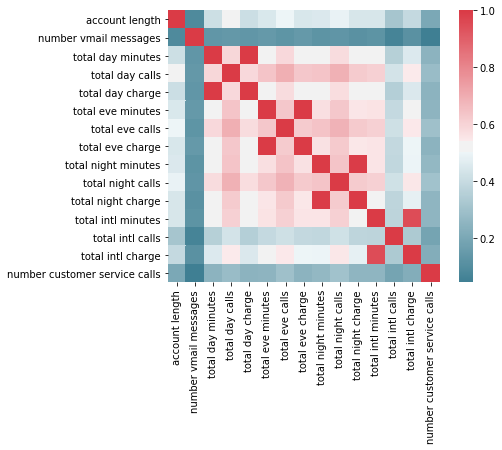

In [142]:
f , ax = plt.subplots(figsize = (7,5))

corr = df_corr.corr()

sns.heatmap(corr , mask = np.zeros_like(corr , dtype = np.bool) , cmap = sns.diverging_palette(220 , 10 , as_cmap = True),
          square = True , ax = ax)

In [143]:
Z.drop(['total day charge' , 'total eve charge' , 'total night minutes' , 'total intl charge'] , axis = 1 , inplace = True)

In [96]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
Churn                            5000 non-null object
international plan               5000 non-null object
voice mail plan                  5000 non-null object
state                            5000 non-null object
account length                   5000 non-null int32
area code                        5000 non-null int32
number vmail messages            5000 non-null int32
total day minutes                5000 non-null int32
total day calls                  5000 non-null int32
total eve minutes                5000 non-null int32
total eve calls                  5000 non-null int32
total night calls                5000 non-null int32
total night charge               5000 non-null int32
total intl minutes               5000 non-null int32
total intl calls                 5000 non-null int32
number customer service calls    5000 non-null int32
dtypes: int32(12), object(4)
memory usage

In [78]:
Z

,Churn,international plan,voice mail plan,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night calls,total night charge,total intl minutes,total intl calls,number customer service calls
0,False.,no,yes,128,25,265,110,197,99,91,11,10,3,1
1,False.,no,yes,107,26,161,123,195,103,103,11,13,3,1
2,False.,no,no,137,0,243,114,121,110,104,7,12,5,0
3,False.,yes,no,116,9,183,94,193,88,89,8,6,7,2
4,False.,yes,no,75,0,166,113,148,122,121,8,10,3,3
5,False.,yes,no,118,0,223,98,220,101,118,9,6,6,0
6,False.,no,yes,79,14,252,101,244,97,118,9,7,7,3
7,False.,yes,no,147,0,157,79,103,94,96,9,7,6,0
8,False.,no,no,125,10,213,98,206,100,90,9,8,4,1
9,False.,yes,yes,141,37,258,84,222,111,97,14,11,5,0


In [ ]:
## Label encoding for categorical variable

In [144]:
for i in range(0 , Z.shape[1]):
    
    if(Z.iloc[:,i].dtypes == 'object'):
        Z.iloc[:,i] = pd.Categorical(Z.iloc[:,i])
        Z.iloc[:,i] = Z.iloc[:,i].cat.codes

In [80]:
Z

,Churn,international plan,voice mail plan,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night calls,total night charge,total intl minutes,total intl calls,number customer service calls
0,0,0,1,128,25,265,110,197,99,91,11,10,3,1
1,0,0,1,107,26,161,123,195,103,103,11,13,3,1
2,0,0,0,137,0,243,114,121,110,104,7,12,5,0
3,0,1,0,116,9,183,94,193,88,89,8,6,7,2
4,0,1,0,75,0,166,113,148,122,121,8,10,3,3
5,0,1,0,118,0,223,98,220,101,118,9,6,6,0
6,0,0,1,79,14,252,101,244,97,118,9,7,7,3
7,0,1,0,147,0,157,79,103,94,96,9,7,6,0
8,0,0,0,125,10,213,98,206,100,90,9,8,4,1
9,0,1,1,141,37,258,84,222,111,97,14,11,5,0


In [145]:
Z['Churn'] = Z['Churn'].replace(0 , 'No')
Z['Churn'] = Z['Churn'].replace(1 , 'Yes')

In [ ]:
# MAnually splitting the data into train and test for feeding into model

In [146]:
C_train = Z.values[0:3332,1:15]
C_test  = Z.values[3333:4999,1:15]

D_train = Z.values[0:3332,0]
D_test  = Z.values[3333:4999,0]

In [ ]:
## Decision Tree Classification

In [41]:
DT = tree.DecisionTreeClassifier(criterion = 'entropy').fit(C_train , D_train)

In [42]:
DT_Predict = DT.predict(C_test)

In [ ]:
DT_Predict

In [43]:
CM = confusion_matrix(D_test , DT_Predict)

In [44]:
CM

array([[1328,  114],
       [  92,  132]], dtype=int64)

In [45]:
CM = pd.crosstab(D_test , DT_Predict)

In [46]:
CM

col_0,No,Yes
row_0,,
No,1328,114
Yes,92,132


In [47]:
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [49]:
accuracy_score(D_test , DT_Predict)*100

87.63505402160864

In [ ]:
# Accuracy

In [50]:
((TP+TN)*100)/(TP+TN+FP+FN)

87.63505402160864

In [ ]:
# FNR

In [51]:
(FN*100)/(FN+TP)

41.07142857142857

In [ ]:
# Recall

In [98]:
(TP*100)/(TP+FN)

60.810810810810814

In [ ]:
###########

In [ ]:
# Random Forest

In [52]:
RF = RandomForestClassifier(n_estimators = 500).fit(C_train , D_train)

In [53]:
RF_Pred = RF.predict(C_test)

In [ ]:
RF_Pred 

In [55]:
CM = confusion_matrix(D_test , RF_Pred)
CM = pd.crosstab(D_test , RF_Pred)

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [56]:
# Accuracy

((TP+TN)*100)/(TP+TN+FP+FN)

91.17647058823529

In [57]:
# FNR

(FN*100)/(FN+TP)

44.19642857142857

In [ ]:
# Naive Bayes

In [58]:
NB = GaussianNB().fit(C_train , D_train)

In [59]:
NB_Pred = NB.predict(C_test)

In [ ]:
NB_Pred

In [61]:
CM = pd.crosstab(D_test , NB_Pred)

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [62]:
# Accuracy

((TP+TN)*100)/(TP+TN+FP+FN)

86.37454981992798

In [63]:
# FNR

(FN*100)/(FN+TP)

62.94642857142857

In [ ]:
############

In [ ]:
#### KNN MOdel

In [147]:
KNN_model = KNeighborsClassifier(n_neighbors = 9).fit(C_train , D_train)

In [148]:
KNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [149]:
KNN_Pred = KNN_model.predict(C_test)

In [150]:
KNN_Pred

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'], dtype=object)

In [66]:
CM = pd.crosstab(D_test , KNN_Pred)

TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

In [67]:
# Accuracy

((TP+TN)*100)/(TP+TN+FP+FN)

87.93517406962785

In [68]:
# FNR

(FN*100)/(FN+TP)

66.96428571428571

In [ ]:
#The output of the model can be found in the models itself

In [ ]:
## End of code